In [2]:
import pandas as pd
import json

In [3]:
df = pd.read_csv("../data/isketcher/exp_log.csv", index_col=0)
df

,username,mode,timestamp,sketches,outputs
seq_id,,,,,
f2ee3aa1-6ae2-4b94-b4d1-441a5d42e625,谷垣 健太,1,20220129-034753,"[[[[135, 108], [134, 97], [134, 87], [134, 82]...",NaN
eb12fc11-d11f-4f92-a1ab-5a14a4edcd32,谷垣 健太,1,20220129-041101,"[[[[87, 119.0234375], [87, 112.0234375], [87, ...",NaN
7920f522-1edb-4925-a1e6-76820d27a1a1,Kenta,2,20220129-041146,"[[[[222, 200], [215, 200], [201, 199], [184, 1...",NaN
c286218d-9ed5-418d-a49f-4ae2ca10b204,Kenta,2,20220129-042334,"[[[[213, 249], [213, 249], [213, 249], [213, 2...",NaN
3400cb6d-2334-4a36-b119-0d1ab4bed374,aaaa,1,20220129-042421,"[[[[234.5, 141], [230.5, 143], [226.5, 146], [...",NaN
...,...,...,...,...,...
3559fd75-32cc-4e91-bdf3-14bda7d893af,Kenta,4,20220130-232604,"[[[[101, 148.0234375], [107, 141.0234375], [12...","[{""name"": ""bee"", ""position"": [510, 259, 467, 4..."
99b47bfe-e9c1-4256-b78f-498d78e68489,Kenta,1,20220130-232656,"[[[[266, 103.0234375], [266, 100.0234375], [26...","[{""name"": ""mountain"", ""position"": [323, 313, 2..."
6657e096-255b-409d-8034-4496f8c3702f,Kenta,1,20220130-232735,"[[[[133, 156.0234375], [132, 153.0234375], [13...","[{""name"": ""cloud"", ""position"": [298, 122, 116,..."


In [19]:
sketches = json.loads(df.loc["ac455e08-c70b-480b-8d07-8e8d718ef7e2"]["sketches"])
len(sketches)

12

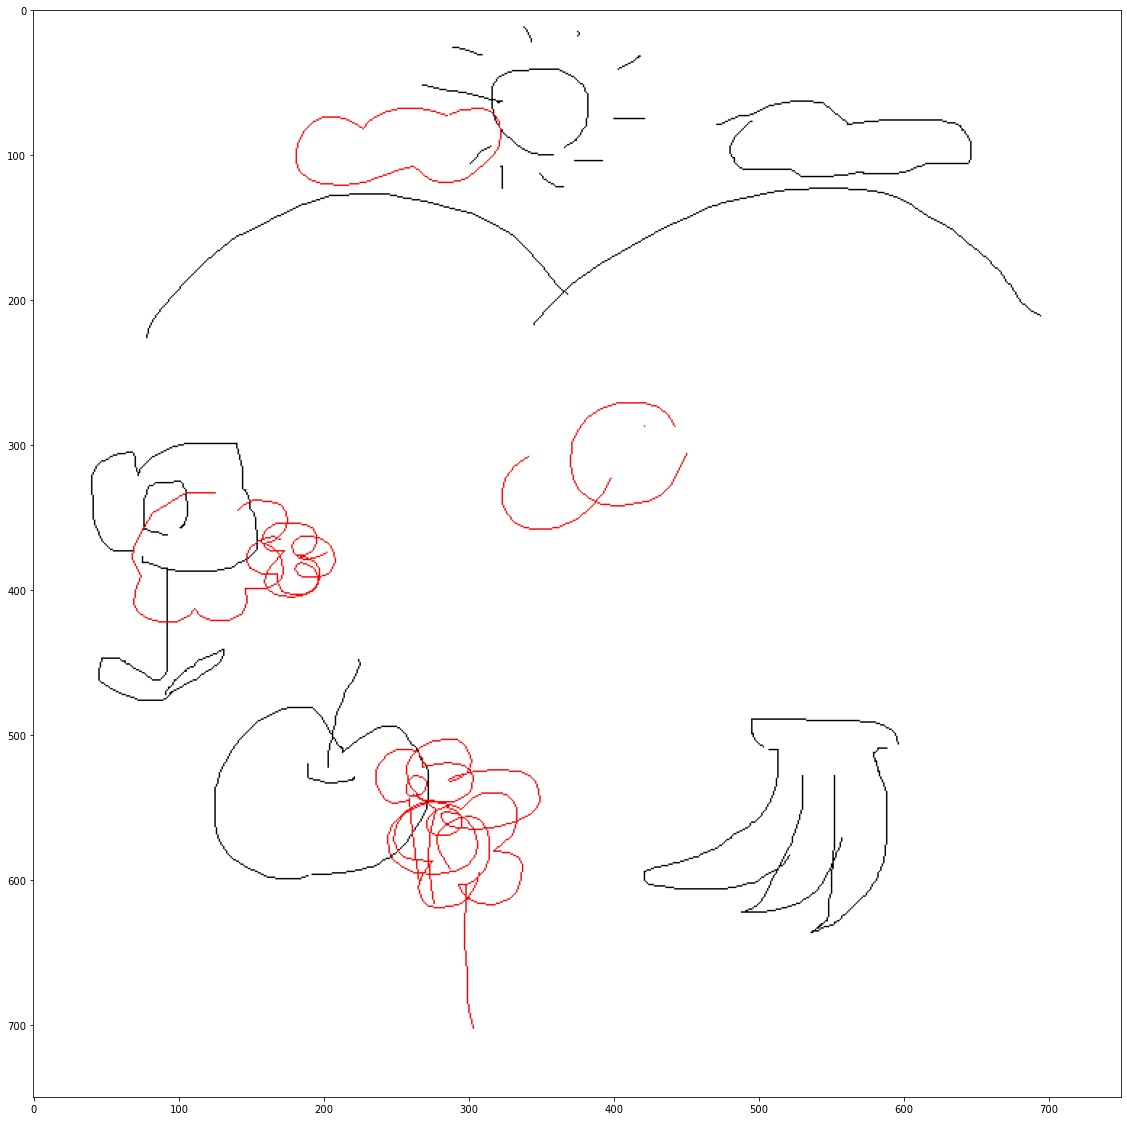

In [20]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

canvas = Image.new('RGB', (750, 750), (255, 255, 255))
draw = ImageDraw.Draw(canvas)

for turn, lines in enumerate(sketches):
    for line in lines:
        for i in range(len(line)-1):
            x1, y1 = line[i]
            x2, y2 = line[i+1]
            if turn % 2 == 0:
                draw.line((x1, y1, x2, y2), fill=(0, 0, 0), width=1)
            else:
                draw.line((x1, y1, x2, y2), fill=(255, 0, 0), width=1)

plt.figure(figsize=(20, 20))
plt.imshow(canvas)
